In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50504_I')

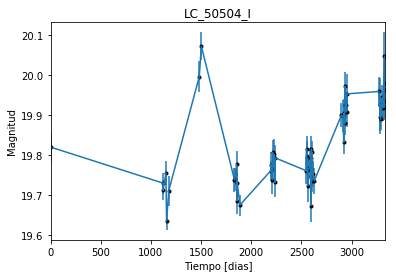

In [2]:
data = np.genfromtxt('LC_50504_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50504_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

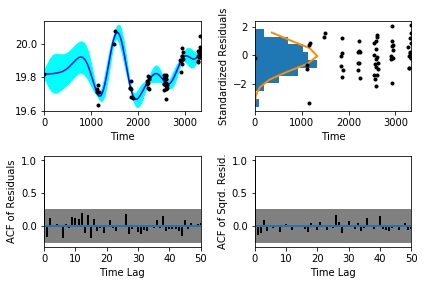

In [5]:
sample.assess_fit()

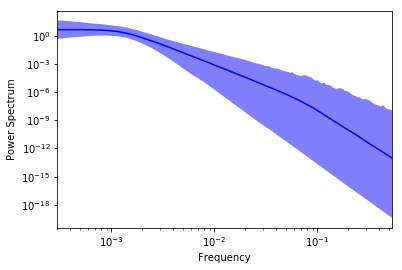

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50504_I')

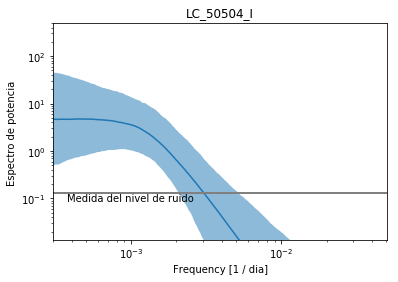

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50504_I')

Text(0.5,1,'Prediccion , valor esperado LC_50504_I')

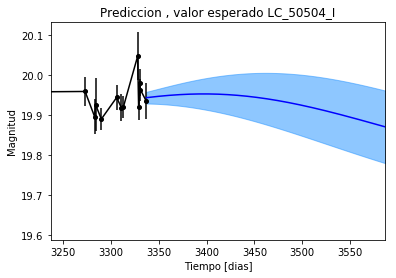

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50504_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50504_I')

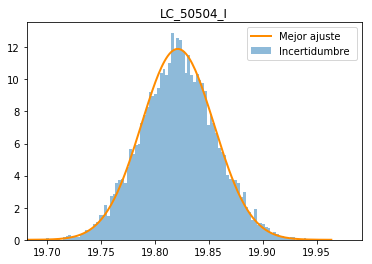

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50504_I')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_I')

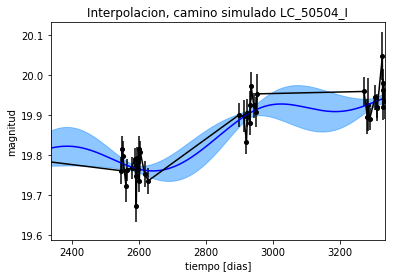

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_I')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_I')

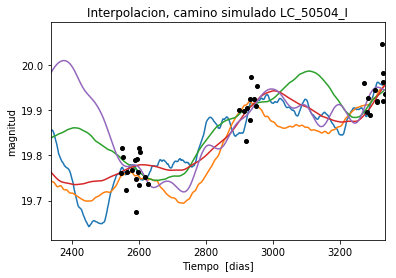

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1294.45977687
Median: 0.00226319520219
Standard deviation: 0.149612768852
68% credibility interval: [ 0.00048064  0.06996151]
95% credibility interval: [  3.25317150e-04   5.63940940e-01]
99% credibility interval: [  3.05115613e-04   9.34805858e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 630.18733947
Median: 0.00110349387046
Standard deviation: 0.074656265189
68% credibility interval: [ 0.00043816  0.01270582]
95% credibility interval: [ 0.00032005  0.24241369]
99% credibility interval: [  3.03851156e-04   5.17029094e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 499.005739409
Median: 0.00383242642589
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 634.168225062
Median: 122.684015571
Standard deviation: 1.93819920001
68% credibility interval: [ 120.55181978  124.35358359]
95% credibility interval: [ 118.03008945  125.37225693]
99% credibility interval: [ 115.7846599   125.90524195]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 280.68698794
Median: 0.202854976541
Standard deviation: 1.7923335732
68% credibility interval: [ 0.02856244  2.38838285]
95% credibility interval: [ 0.01150734  6.30214259]
99% credibility interval: [ 0.00880895  8.73837425]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 235.059698913
Median: 0.0966774574473
Standard deviation: 8.18537804284
68% credibility interval: [  1.57249895e-03   5.18640541e+00]
95% credibility interval: [  2.28

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 531.199966444
Median: 4.36945030639e-23
Standard deviation: 2.4552581207e+85
68% credibility interval: [  3.05675645e-66   1.63817399e+13]
95% credibility interval: [  4.25026021e-95   2.19321912e+73]
99% credibility interval: [  6.59337606e-104   4.00756587e+085]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3844.80481291
Median: 19.8330995964
Standard deviation: 0.0586374798943
68% credibility interval: [ 19.79317873  19.8792352 ]
95% credibility interval: [ 19.71995988  19.96100344]
99% credibility interval: [ 19.63523895  20.04163594]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 224.01960383
Median: 0.00186809285406
Standard deviation: 0.235322562388
68% credibility interval: [ 0.          0.29714123]
95% credibility interval: [ 0.          0.86860891]
99% credibility interval: [ 0.          1.02904492]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 224.01960383
Median: 0.00186809285406
Standard deviation: 0.235322562388
68% credibility interval: [ 0.          0.29714123]
95% credibility interval: [ 0.          0.86860891]
99% credibility interval: [ 0.          1.02904492]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 438.115283544
Median: 0.0
Standard deviation: 0.000558680469466
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 634.168225062
Median: 122.684015571
Standard deviation: 1.93819920001
68% credibility interval: [ 120.55181978  124.35358359]
95% credibility interval: [ 118.03008945  125.37225693]
99% credibility interval: [ 115.7846599   125.90524195]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2387.02658256
Median: 0.0155261276621
Standard deviation: 0.0234675016724
68% credibility interval: [ 0.00877345  0.03135195]
95% credibility interval: [ 0.00553517  0.07915192]
99% credibility interval: [ 0.00424118  0.13869887]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1401.36587147
Median: 1.12690159146
Standard deviation: 0.170209633199
68% credibility interval: [ 0.98183241  1.30432125]
95% credibility interval: [ 0.85589044  1.52331059]
99% credibility interval: [ 0.79168815  1.70807255]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1557.2358888
Median: 1.16358970183e-05
Standard deviation: 0.0370321042869
68% credibility interval: [  6.47241373e-18   8.68672256e-04]
95% credibility interval: [  2.15066341e-79   6.66682914e-03]
99% credibility interval: [  5.49793711e-91   6.82277593e-02]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1294.45977687
Median: (-0.0142200748417-0.00835965419986j)
Standard deviation: 1.75210415
68% credibility interval: [-0.43958115+0.j         -0.00301992-0.00533081j]
95% credibility interval: [ -3.54334543e+00+0.j          -2.04402794e-03-0.00587818j]
99% credibility interval: [ -5.87355843e+00-1.8421357j   -1.91709794e-03-5.15463755j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 630.18733947
Median: (-0.00693345647344+0.00557582430635j)
Standard deviation: 1.55119955716
68% credibility interval: [-0.07983303 +6.59502199e+00j -0.00275303 +5.61662946e-03j]
95% credibility interval: [-1.52313014+2.25971715j -0.00201090+4.9621986j ]
99% credibility interval: [ -3.24858961e+00+3.36889522j  -1.90915312e-03+0.j        ]
P